In [70]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt

## Volatility comparison 

In [104]:
SV = ['HESTON','SVJ','SVCJ']
MODELS = ['BLACK_SCHOLES']

In [105]:
df = pd.read_csv(f'Results/calibration/results/test_run/HESTON/parameters.csv',usecols=['date'])

for x in SV:
    df[x]= pd.read_csv(f'Results/calibration/results/test_run/{x}/parameters.csv')['XI']
    df[x][df[x].idxmax()] =np.mean(df[x])
    

C:\Users\Yassir EL-ORFI\AppData\Local\Temp\ipykernel_11108\3824263140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x][df[x].idxmax()] =np.mean(df[x])
C:\Users\Yassir EL-ORFI\AppData\Local\Temp\ipykernel_11108\3824263140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x][df[x].idxmax()] =np.mean(df[x])
C:\Users\Yassir EL-ORFI\AppData\Local\Temp\ipykernel_11108\3824263140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [106]:
for x in MODELS:
    df[x] = pd.read_csv(f'Results/calibration/results/test_run/{x}/parameters.csv')['SIGMA']
    #df[x][df[x].idxmax()] =np.mean(df[x])

In [107]:
df.date = pd.to_datetime(df.date,format='%Y%m%d')
df = df.sort_values(by='date')
df = df.set_index('date')

In [7]:
#df = df[(df.index >= '2019-04-01') & (df.index < '2019-10-01')]
#df = df[(df.index >= '2019-10-01') & (df.index < '2020-02-01')]
#df = df[(df.index >= '2020-02-01') & (df.index < '2020-07-01')]

In [167]:
SV_PLOT = {'HESTON':'#AC78ED','SVJ':'#26D9AE','SVCJ':'#2F5FD0'}


### 3 separate pictures

In [168]:
fig, axs = plt.subplots(nrows=3, figsize=(16, 18))

for (x, y), ax in zip(SV_PLOT.items(), axs):
    ax.plot(df[x], color=y, marker='*',label=x)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylim((-0.5,0.3 + max(df['SVCJ'])))
    ax.set_xlabel("Date")
    ax.set_ylabel("$\sigma$")
    ax.legend()




In [88]:
df1 = df[(df.index >= '2019-04-01') & (df.index < '2019-10-01')]
df2 = df[(df.index >= '2019-10-01') & (df.index < '2020-02-01')]
df3 = df[(df.index >= '2020-02-01') & (df.index < '2020-07-01')]
SV_list = [df1,df2,df3]

In [89]:
summary = df1.describe()

for x in SV_list[1:]:
    summary = pd.concat([summary,x.describe()])
summary

HESTON         SVJ        SVCJ  BLACK_SCHOLES
count  183.000000  183.000000  183.000000     183.000000
mean     0.820733    0.777677    0.874309       0.836132
std      0.316698    0.332176    0.349707       0.160339
min      0.000010    0.000010    0.000010       0.501331
25%      0.622739    0.621274    0.693444       0.713268
50%      0.837979    0.806497    0.923122       0.840855
75%      1.039228    0.985475    1.063281       0.974311
max      1.490169    1.567651    2.428818       1.201496
count  123.000000  123.000000  123.000000     123.000000
mean     0.683496    0.716570    0.895940       0.685431
std      0.304612    0.359059    0.369764       0.072696
min      0.000071    0.000012    0.000010       0.609593
25%      0.499542    0.564334    0.700998       0.632095
50%      0.750002    0.794964    1.015064       0.662908
75%      0.902958    0.947692    1.188700       0.711858
max      1.433440    1.403453    1.440897       0.905238
count  151.000000  151.000000  151.000000     151.000000
mean     0.540760    0.683592    0.821150       0.784722
std      0.407935    0.479485    0.383081       0.206104
min      0.000010    0.000010    0.000010       0.565683
25%      0.274812    0.287369    0.611654       0.633417
50%      0.497531    0.728471    0.869842       0.726482
75%      0.771076    1.003599    1.042206       0.872658
max      2.586527    3.834536    2.371468       1.754010

In [90]:
summary = summary[['HESTON','SVJ','SVCJ']]
summary.index = ['count', '$\hat{\mu}$', '$\hat{\sigma}$', 'min', '$q_{25}$', '$q_{50}$', '$q_{75}$', 'max', 'count',
       '$\hat{\mu}$', '$\hat{\sigma}$', 'min', '$q_{25}$', '$q_{50}$', '$q_{75}$', 'max', 'count', '$\hat{\mu}$',
       '$\hat{\sigma}$', 'min', '$q_{25}$', '$q_{50}$', '$q_{75}$', 'max']
summary

HESTON         SVJ        SVCJ
count           183.000000  183.000000  183.000000
$\hat{\mu}$       0.820733    0.777677    0.874309
$\hat{\sigma}$    0.316698    0.332176    0.349707
min               0.000010    0.000010    0.000010
$q_{25}$          0.622739    0.621274    0.693444
$q_{50}$          0.837979    0.806497    0.923122
$q_{75}$          1.039228    0.985475    1.063281
max               1.490169    1.567651    2.428818
count           123.000000  123.000000  123.000000
$\hat{\mu}$       0.683496    0.716570    0.895940
$\hat{\sigma}$    0.304612    0.359059    0.369764
min               0.000071    0.000012    0.000010
$q_{25}$          0.499542    0.564334    0.700998
$q_{50}$          0.750002    0.794964    1.015064
$q_{75}$          0.902958    0.947692    1.188700
max               1.433440    1.403453    1.440897
count           151.000000  151.000000  151.000000
$\hat{\mu}$       0.540760    0.683592    0.821150
$\hat{\sigma}$    0.407935    0.479485    0.383081
min               0.000010    0.000010    0.000010
$q_{25}$          0.274812    0.287369    0.611654
$q_{50}$          0.497531    0.728471    0.869842
$q_{75}$          0.771076    1.003599    1.042206
max               2.586527    3.834536    2.371468

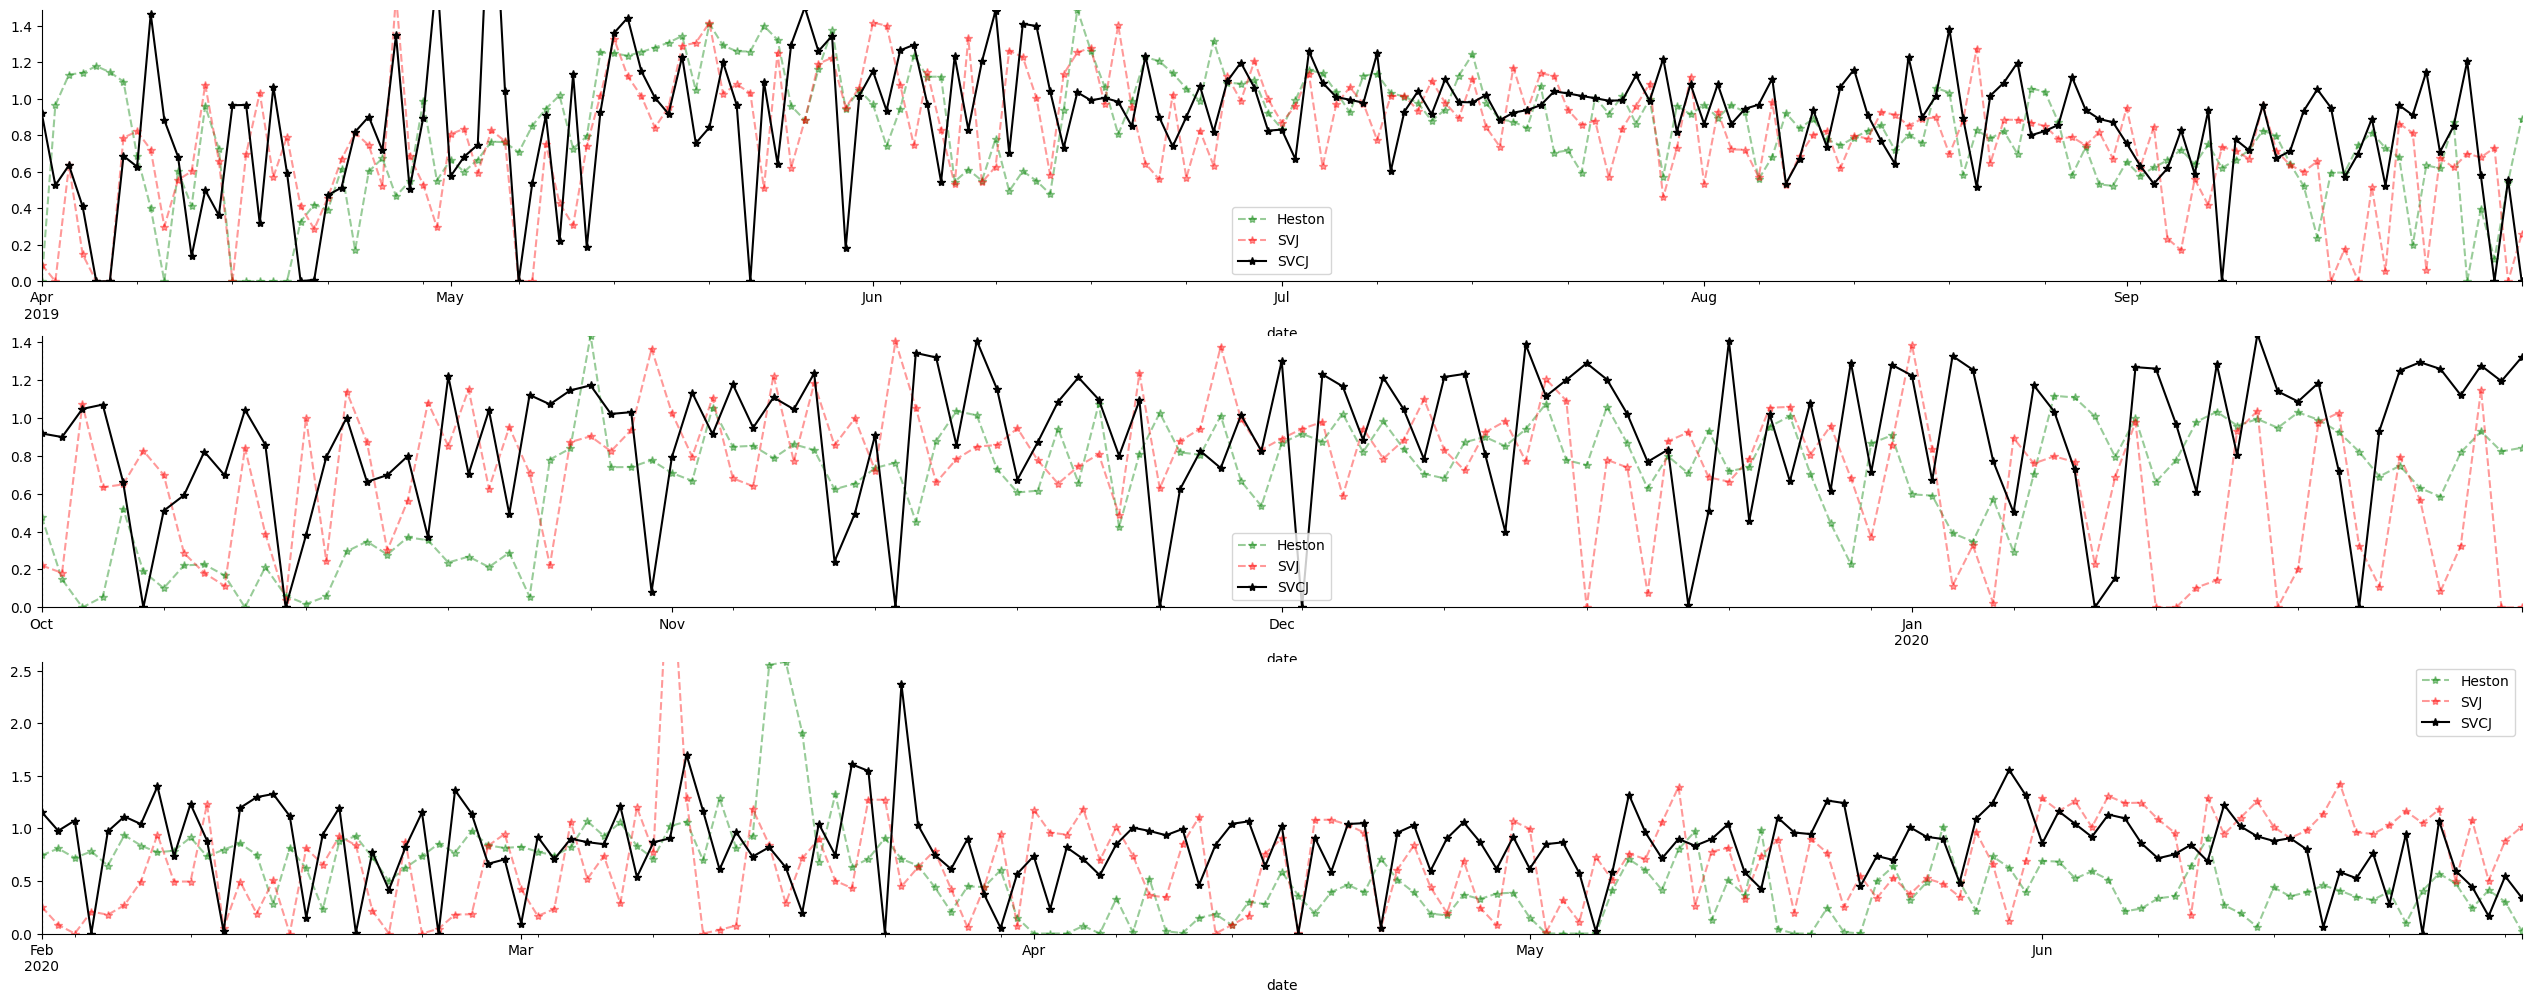

In [135]:
fig, axs = plt.subplots(nrows=3,figsize=(32, 12))

for idx,df in enumerate([df1,df2,df3]):
    ax = axs[idx]

    df['HESTON'].plot(ax=ax, label="Heston", linestyle='dashed', color = 'green',marker='*',alpha=0.4)
    df['SVJ'].plot(ax=ax, label="SVJ", linestyle='dashed',color='red',marker='*',alpha=0.4)
    df['SVCJ'].plot(ax=ax, label="SVCJ",color='black',marker='*')

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.set_ylim(ymin=0, ymax=np.max(df['HESTON']))

    ax.vlines('2019-10-01', 0, ymax=np.max(df['HESTON']), colors='black',linestyles='dotted')
    ax.vlines('2020-02-01', 0, ymax=np.max(df['HESTON']), colors='black',linestyles='dotted')
    ax.legend()

#fig.savefig(f'Results/calibration/figures/VolVol_long.pdf',transparent=True)

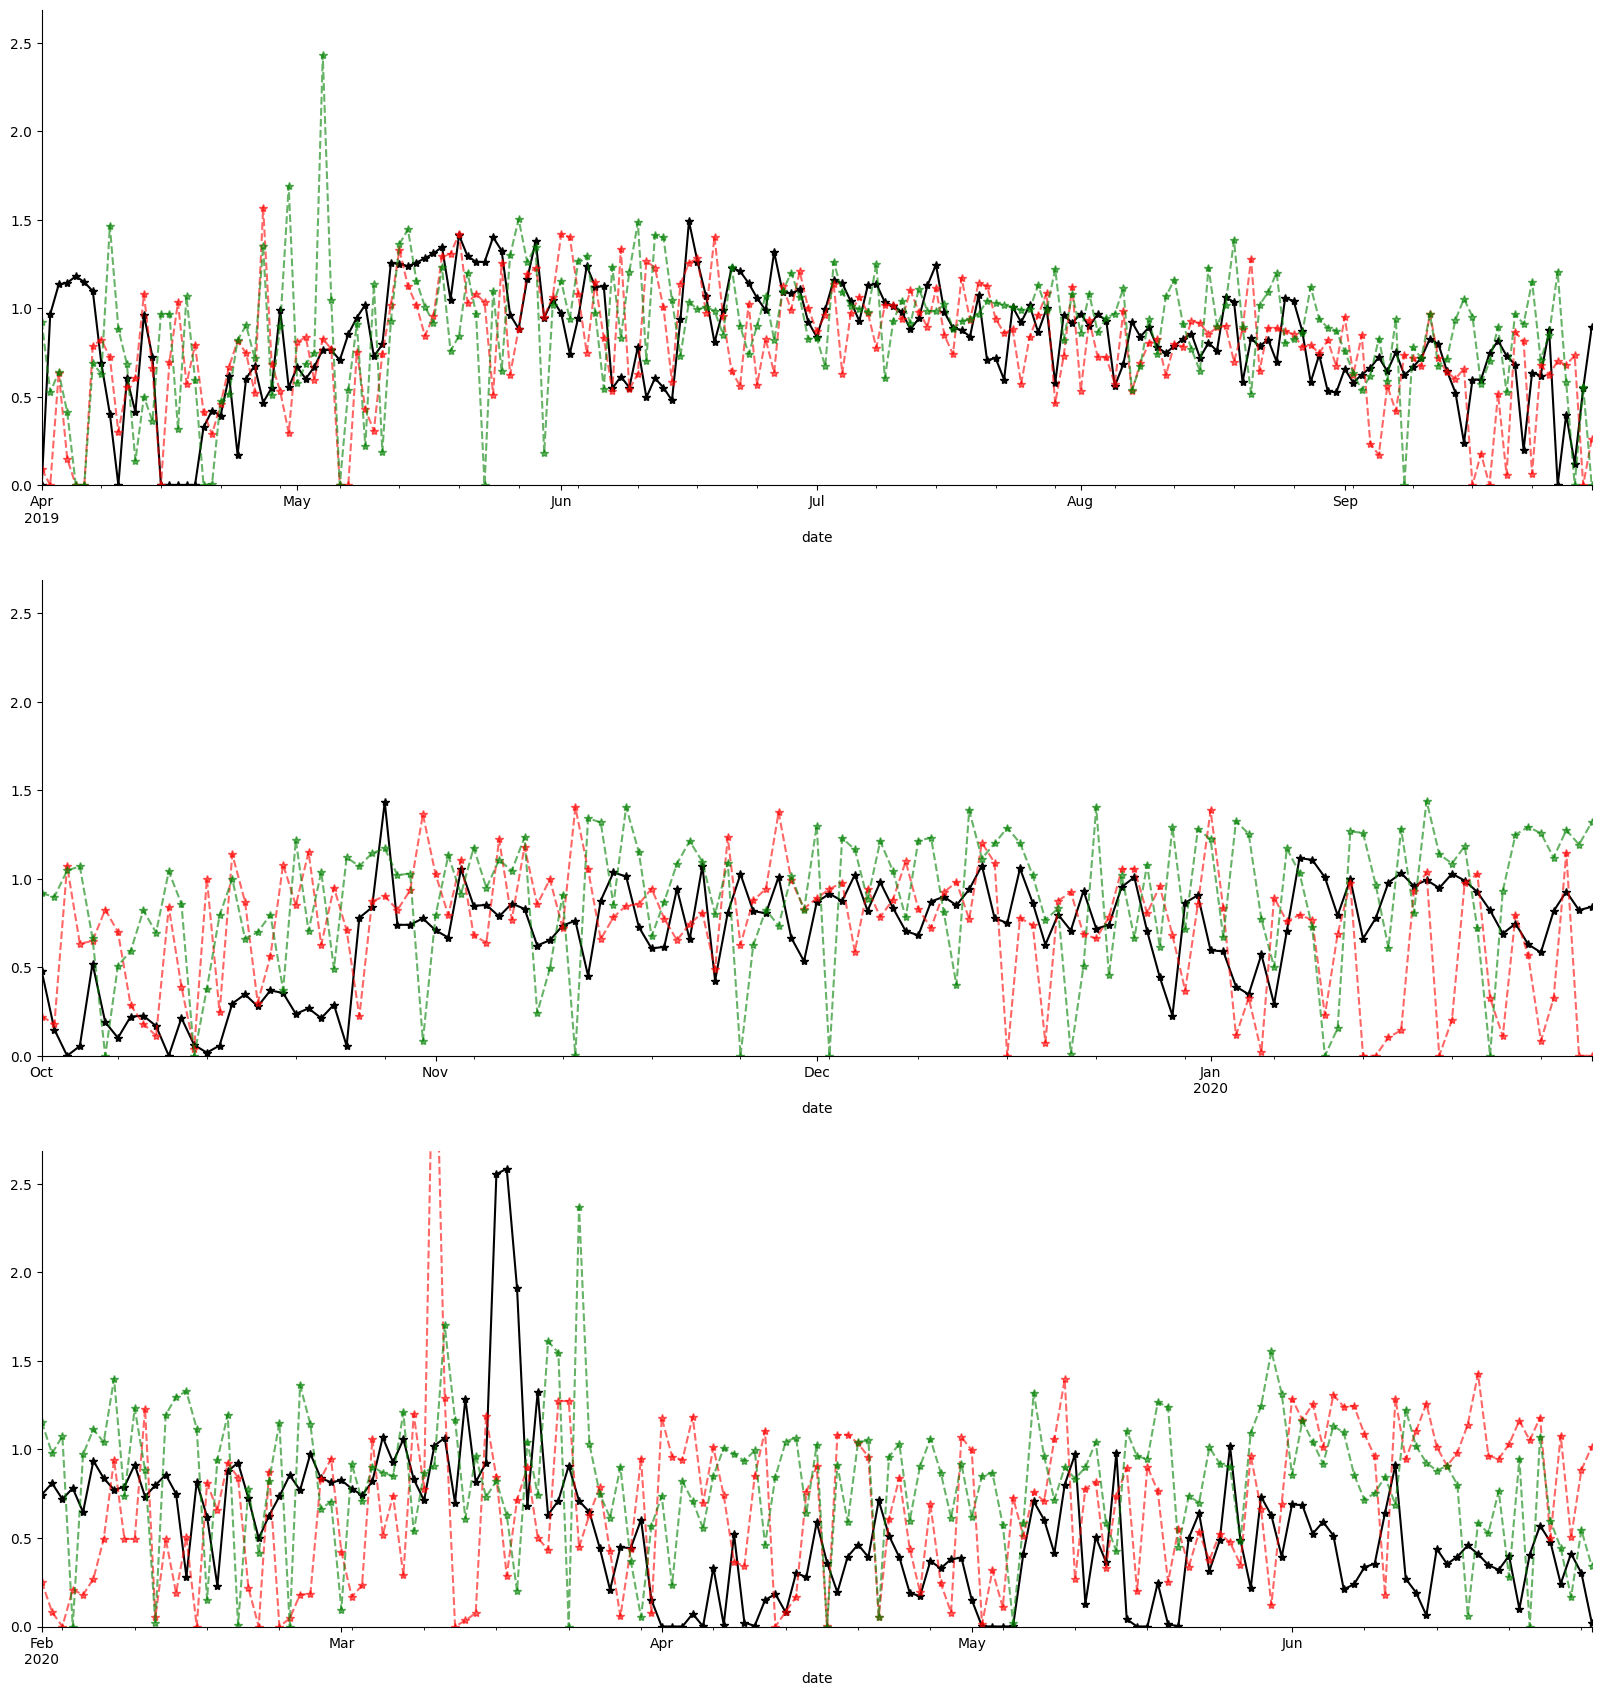

In [169]:
fig, axs = plt.subplots(nrows=3,figsize=(20, 21))


for idx, s in enumerate(SV_list):
    ax = axs[idx]
    #fig, ax = plt.subplots(figsize=(10, 4))
    s['HESTON'].plot(ax=ax, label="Heston", color = 'black',marker='*')
    s['SVJ'].plot(ax=ax, label="SVJ", linestyle='dashed',color='red',marker='*',alpha=0.6)
    s['SVCJ'].plot(ax=ax, label="SVCJ", linestyle='dashed',color='green',marker='*',alpha=0.6)
    
# Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylim((0, 0.1+max(df['HESTON'])))
    
#fig.savefig(f'Results/calibration/figures/volvol_3.pdf',transparent=True)
 

## Volatility comparison BS vs SVCJ

In [99]:
sigmas = df[['BLACK_SCHOLES','SVCJ']]
#sigmas.plot()

SIGMA_PLOT = {'BLACK_SCHOLES':'blue','SVCJ':'darkgrey'}


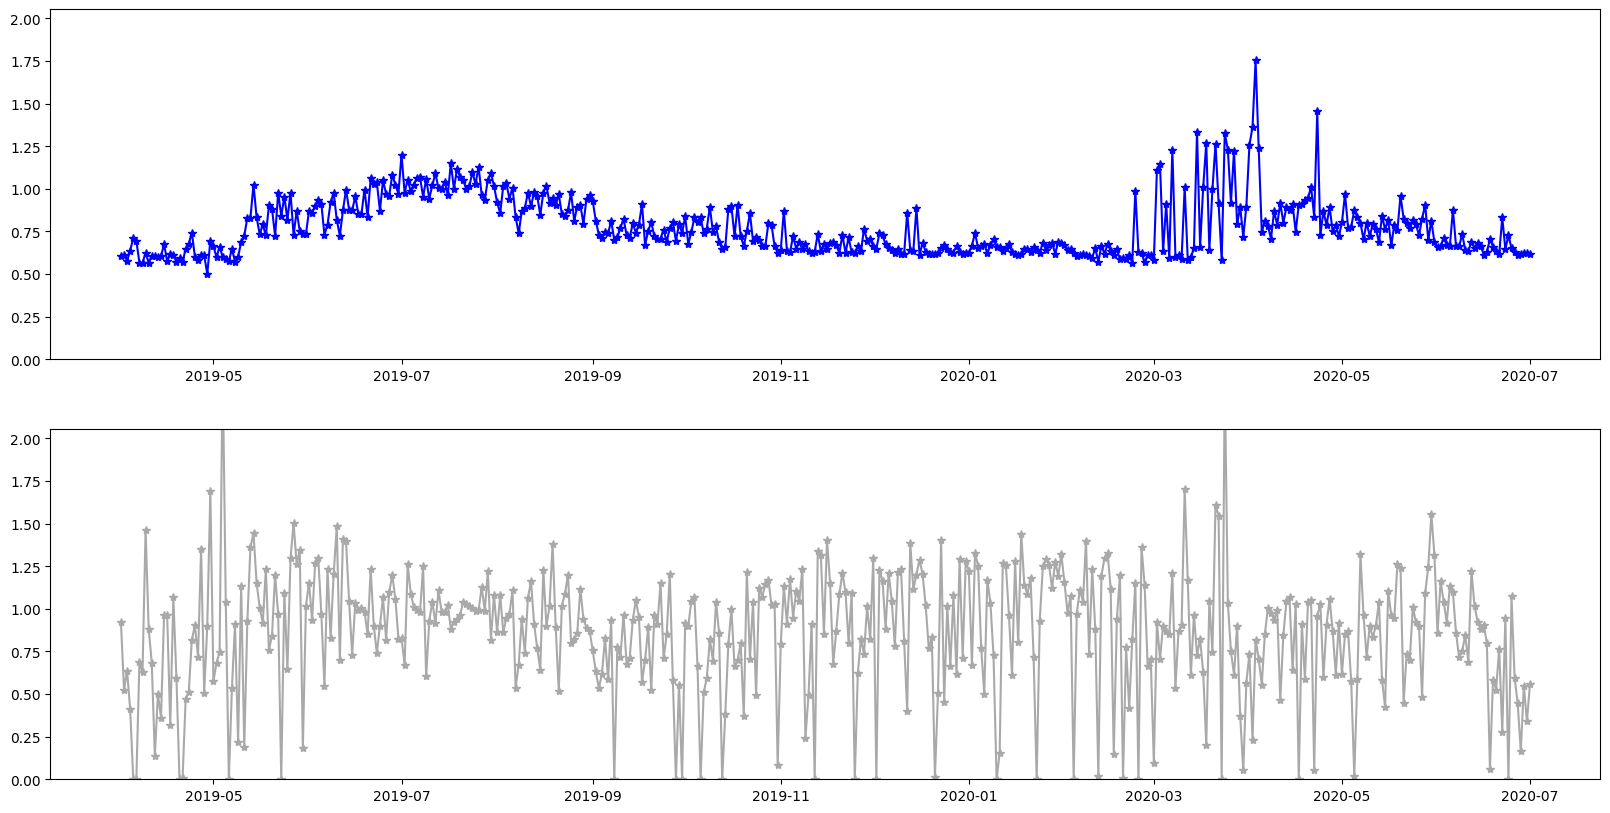

In [110]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 10))

for (x, y), ax in zip(SIGMA_PLOT.items(), axs):
    ax.plot(df[x], color=y, marker='*')
    ax.set_ylim((0,0.3 + max(df['BLACK_SCHOLES'])))


In [111]:
sigmas = df[['BLACK_SCHOLES','SVCJ']]

#sigmas['BLACK_SCHOLES'][df['BLACK_SCHOLES'].idxmax()] =np.mean(df['BLACK_SCHOLES'])
#sigmas['MERTON'][df['MERTON'].idxmax()] =np.mean(df['MERTON'])

In [112]:
sigmas1 = sigmas[(sigmas.index >= '2019-04-01') & (sigmas.index < '2019-10-01')]
sigmas2 = sigmas[(sigmas.index >= '2019-10-01') & (sigmas.index < '2020-02-01')]
sigmas3 = sigmas[(sigmas.index >= '2020-02-01') & (sigmas.index < '2020-07-01')]

SIGMA = [sigmas1,sigmas2,sigmas3]

In [113]:
sigmas2.describe()

BLACK_SCHOLES        SVCJ
count     123.000000  123.000000
mean        0.685431    0.895940
std         0.072696    0.369764
min         0.609593    0.000010
25%         0.632095    0.700998
50%         0.662908    1.015064
75%         0.711858    1.188700
max         0.905238    1.440897

### ONE PICTURE 

In [156]:
fig, ax = plt.subplots(figsize=(21, 9))
sigmas['BLACK_SCHOLES'].plot(ax=ax, label="Black&Scholes", color = 'dimgrey',marker='*')
sigmas['SVCJ'].plot(ax=ax, label="SVCJ", linestyle='dashed',color='red',marker='*',alpha=0.6)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_ylim(ymin=0)
ax.legend()


ax.vlines('2019-10-01', 0, ymax=np.max(sigmas['BLACK_SCHOLES']), colors='black', linestyles='dotted') 
ax.vlines('2020-02-01', 0, ymax=np.max(sigmas['BLACK_SCHOLES']), colors='black', linestyles='dotted')

fig.savefig(f'Results/calibration/figures/bsjd_vol_dash.pdf', transparent=True)



### 3 PICTURES WITH DIFFERENT AXIS 

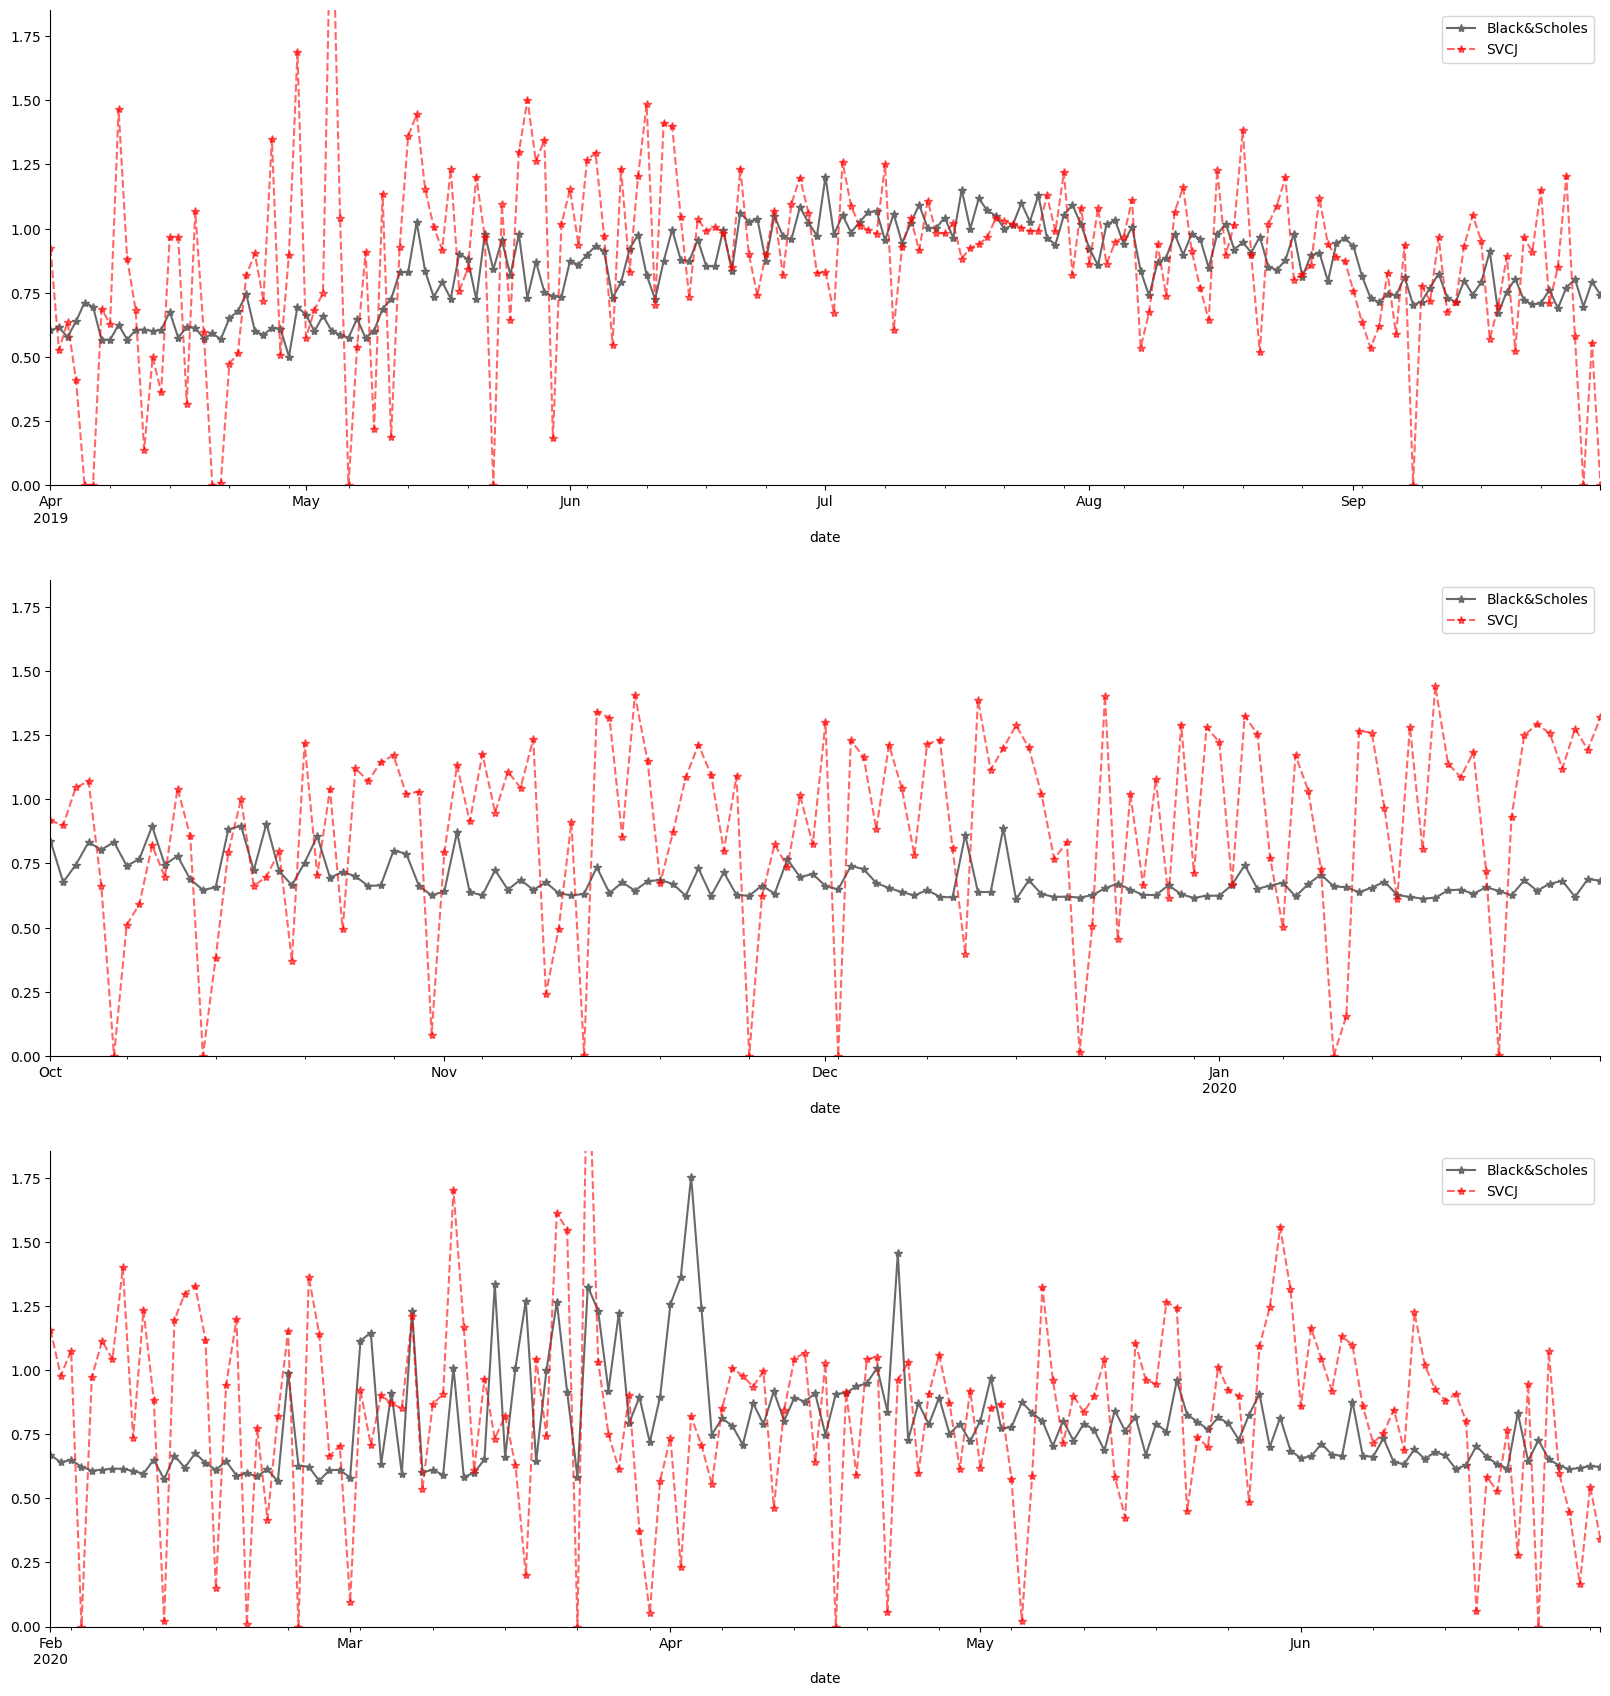

In [157]:
fig, axs = plt.subplots(nrows=3, figsize=(20, 21))


for (idx, s), ax in zip(enumerate(SIGMA), axs):
    ax = axs[idx]
    #fig, ax = plt.subplots(figsize=(10, 4))
    s['BLACK_SCHOLES'].plot(ax=ax, label="Black&Scholes", color = 'dimgrey',marker='*')
    s['SVCJ'].plot(ax=ax, label="SVCJ", linestyle='dashed',color='red',marker='*',alpha=0.6)

# Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylim((0, 0.1+max(sigmas['BLACK_SCHOLES'])))
    ax.legend()
    
#fig.savefig(f'Results/calibration/figures/bsjd_vol2.pdf')
 

## JUMP SIZE ANALYSIS $\lambda$

In [120]:
JUMP = ['SVJ','SVCJ']  

In [121]:
lambda_analysis = pd.read_csv(f'Results/calibration/results/test_run/HESTON/parameters.csv',usecols=['date'])

In [122]:
for j in JUMP:
    lambda_analysis[j] = pd.read_csv(f'Results/calibration/results/test_run/{j}/parameters.csv')['LAMBDA']
    

In [123]:
lambda_analysis.date = pd.to_datetime(lambda_analysis.date,format='%Y%m%d')
lambda_analysis = lambda_analysis.sort_values(by='date')
lambda_analysis = lambda_analysis.set_index('date')

### ONE PICTURE 

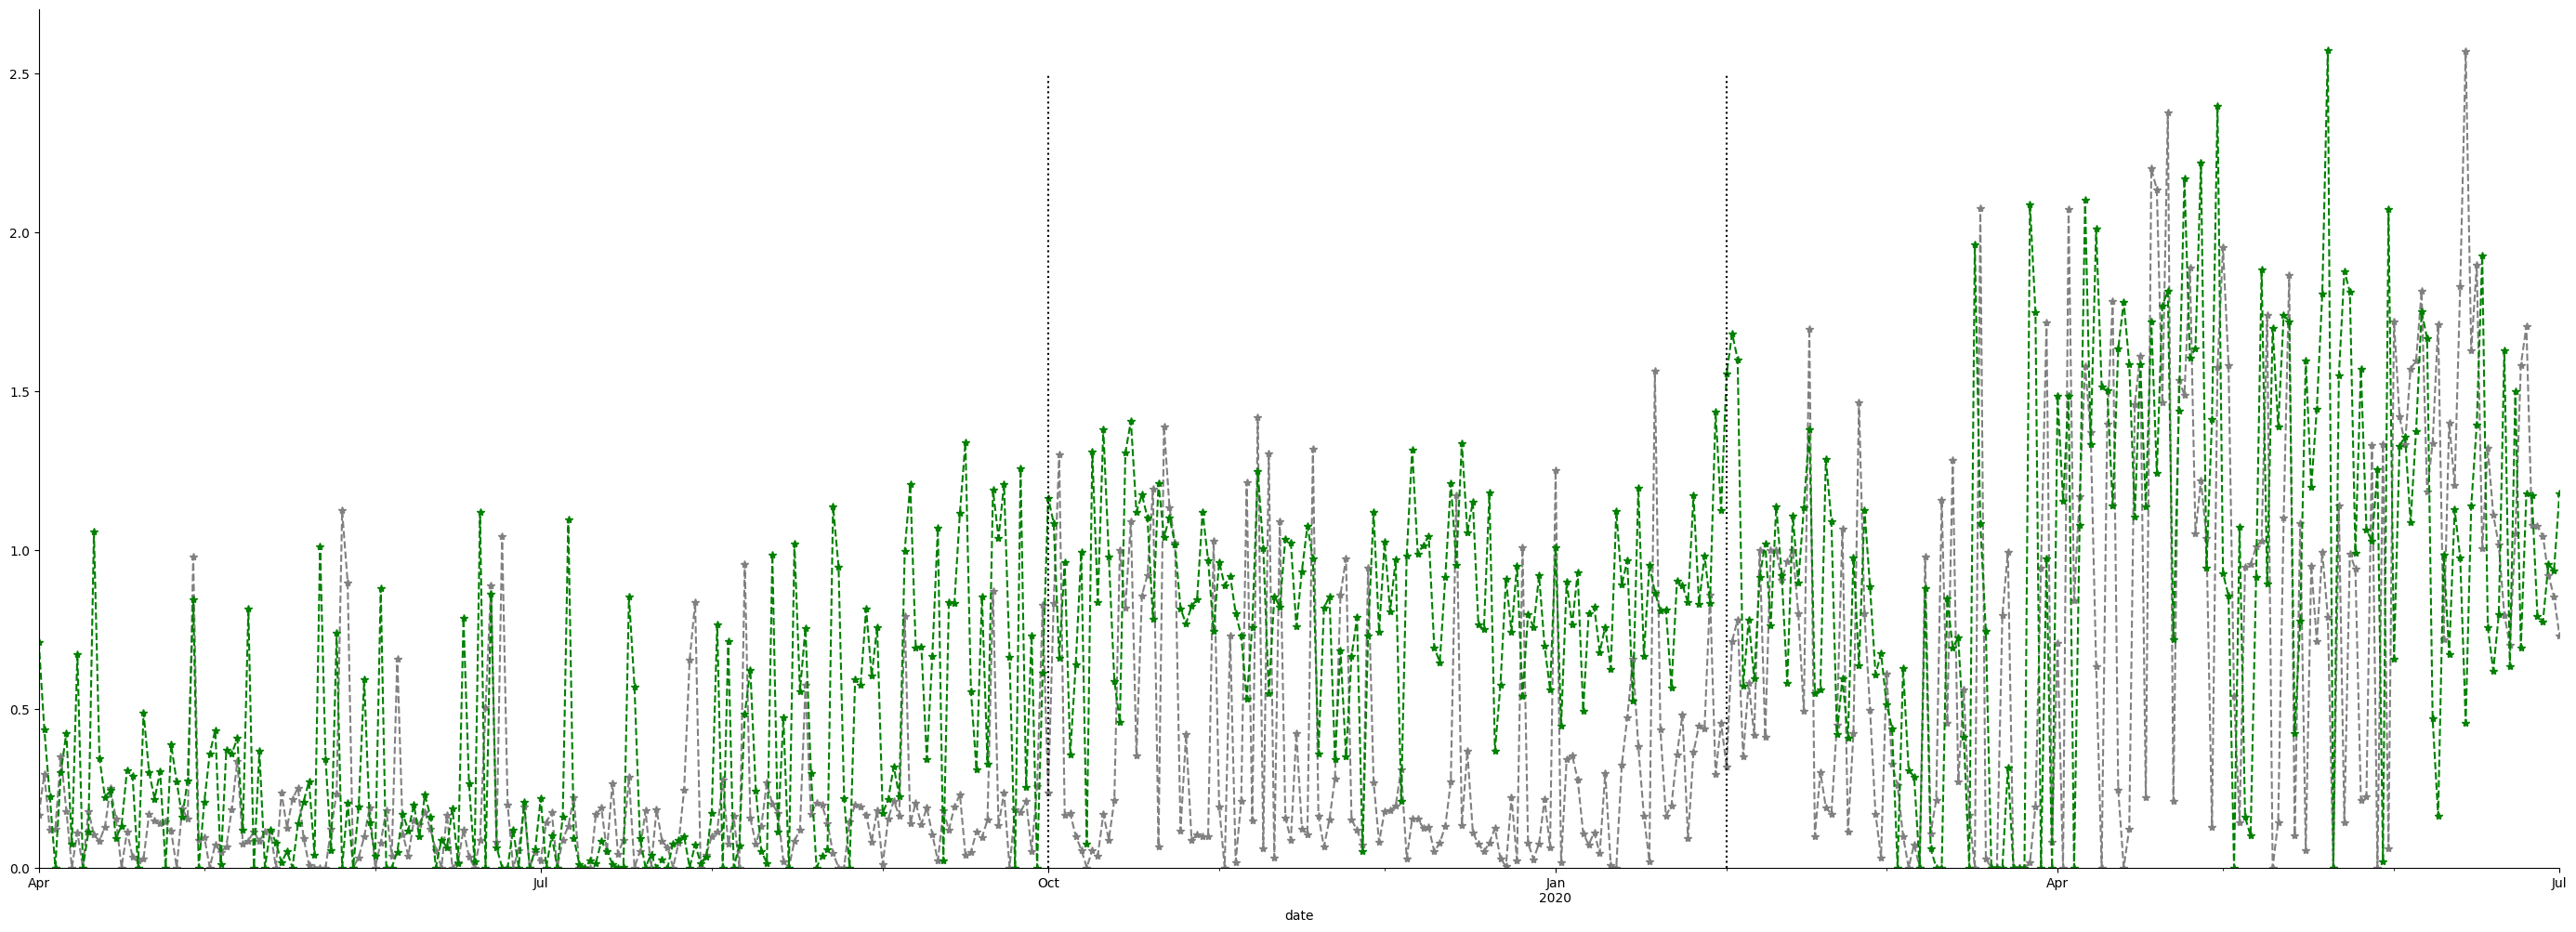

In [124]:
fig, ax = plt.subplots(figsize=(35, 12))
lambda_analysis['SVJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='gray',marker='*')
lambda_analysis['SVCJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='green',marker='*')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_ylim(ymin=0)

ax.vlines('2019-10-01', 0, ymax=2.5, colors='black',linestyles='dotted')
ax.vlines('2020-02-01', 0, ymax=2.5, colors='black',linestyles='dotted')

fig.savefig(f'Results/calibration/figures/lambda_long.pdf',transparent=True)


### MULTIPLE PICTURES

In [125]:
lambda_analysis1 = lambda_analysis[(lambda_analysis.index >= '2019-04-01') & (lambda_analysis.index < '2019-10-01')]
lambda_analysis2 = lambda_analysis[(lambda_analysis.index >= '2019-10-01') & (lambda_analysis.index < '2020-02-01')]
lambda_analysis3 = lambda_analysis[(lambda_analysis.index >= '2020-02-01') & (lambda_analysis.index < '2020-07-01')]

LAMBDA_ANALYSIS = [lambda_analysis1,lambda_analysis2,lambda_analysis3]

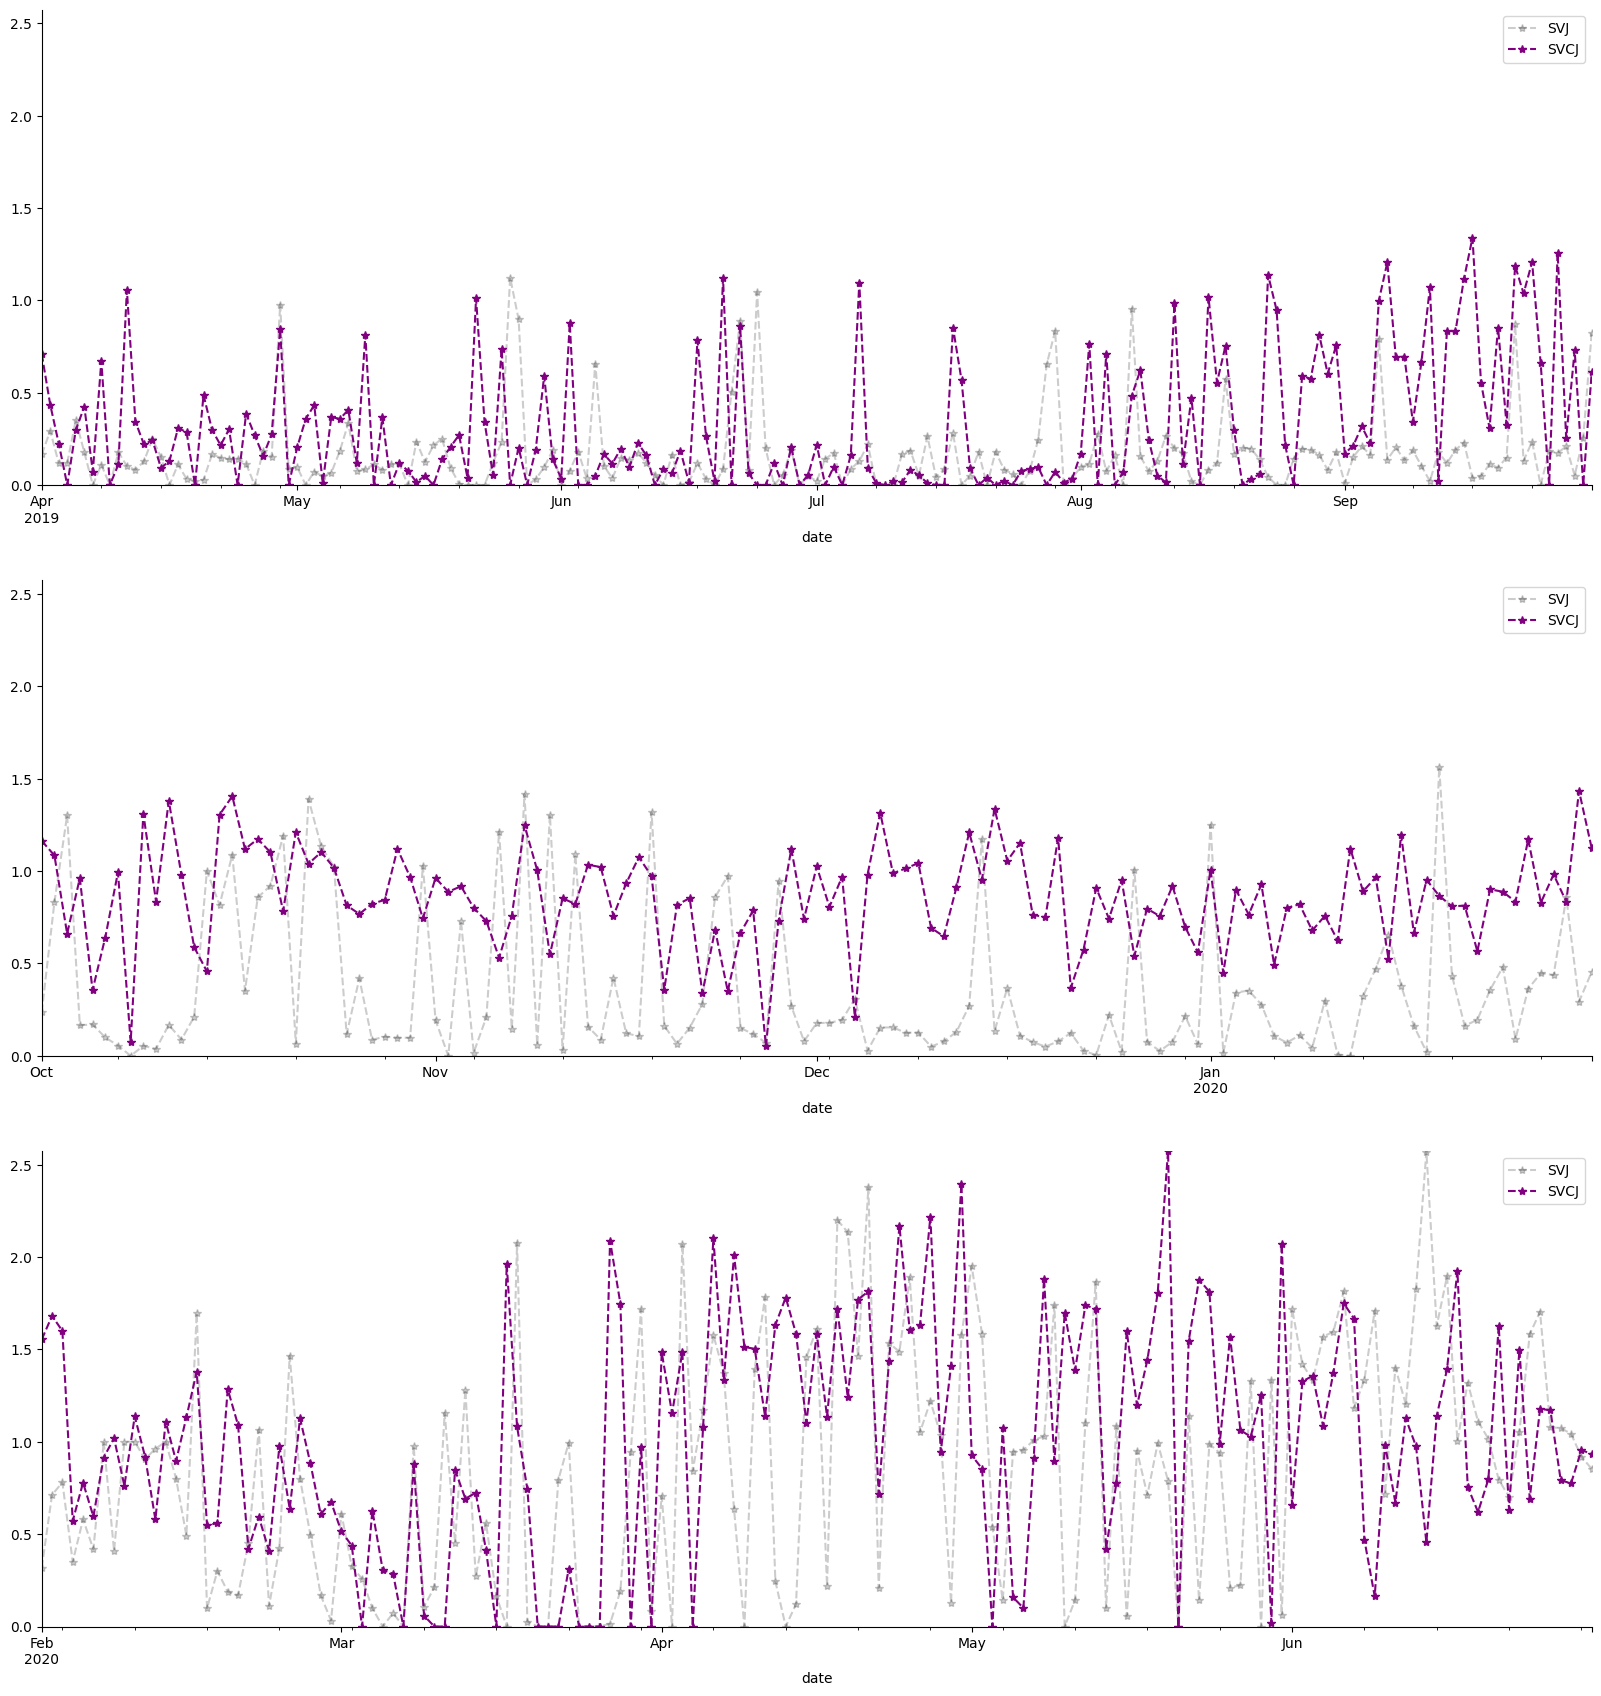

In [133]:
fig, axs = plt.subplots(nrows=3, figsize=(20, 21))

for idx, l in enumerate(LAMBDA_ANALYSIS):
    
    ax = axs[idx]
    
    l['SVJ'].plot(ax=ax, label="SVJ", linestyle='dashed',color='black',marker='*',alpha=0.2)
    l['SVCJ'].plot(ax=ax, label="SVCJ", linestyle='dashed',color='purple',marker='*')
    
# Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylim((0, max(lambda_analysis['SVCJ'])))
    ax.legend()

fig.savefig(f'Results/calibration/figures/lambda_all.pdf',transparent=True)
    


### RHO

In [136]:
rho = pd.read_csv(f'Results/calibration/results/test_run/HESTON/parameters.csv',usecols=['date'])

for x in SV:
    rho[x]= pd.read_csv(f'Results/calibration/results/test_run/{x}/parameters.csv')['RHO']
    rho[x][rho[x].idxmax()] =np.mean(rho[x])
    

C:\Users\Yassir EL-ORFI\AppData\Local\Temp\ipykernel_11108\4089175104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rho[x][rho[x].idxmax()] =np.mean(rho[x])
C:\Users\Yassir EL-ORFI\AppData\Local\Temp\ipykernel_11108\4089175104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rho[x][rho[x].idxmax()] =np.mean(rho[x])
C:\Users\Yassir EL-ORFI\AppData\Local\Temp\ipykernel_11108\4089175104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [137]:
rho.date = pd.to_datetime(rho.date,format='%Y%m%d')
rho = rho.sort_values(by='date')
rho = rho.set_index('date')

In [140]:
rho['SVJ'][rho['SVJ'].idxmin()] =np.mean(rho['SVJ'])
rho['SVCJ'][rho['SVCJ'].idxmin()] =np.mean(rho['SVCJ'])
rho['HESTON'][rho['HESTON'].idxmin()] =np.mean(rho['HESTON'])

In [141]:
rho1 = rho[(rho.index >= '2019-04-01') & (rho.index < '2019-10-01')]
rho2 = rho[(rho.index >= '2019-10-01') & (rho.index < '2020-02-01')]
rho3 = rho[(rho.index >= '2020-02-01') & (rho.index < '2020-07-01')]

SV_list_2 = [rho1,rho2,rho3]

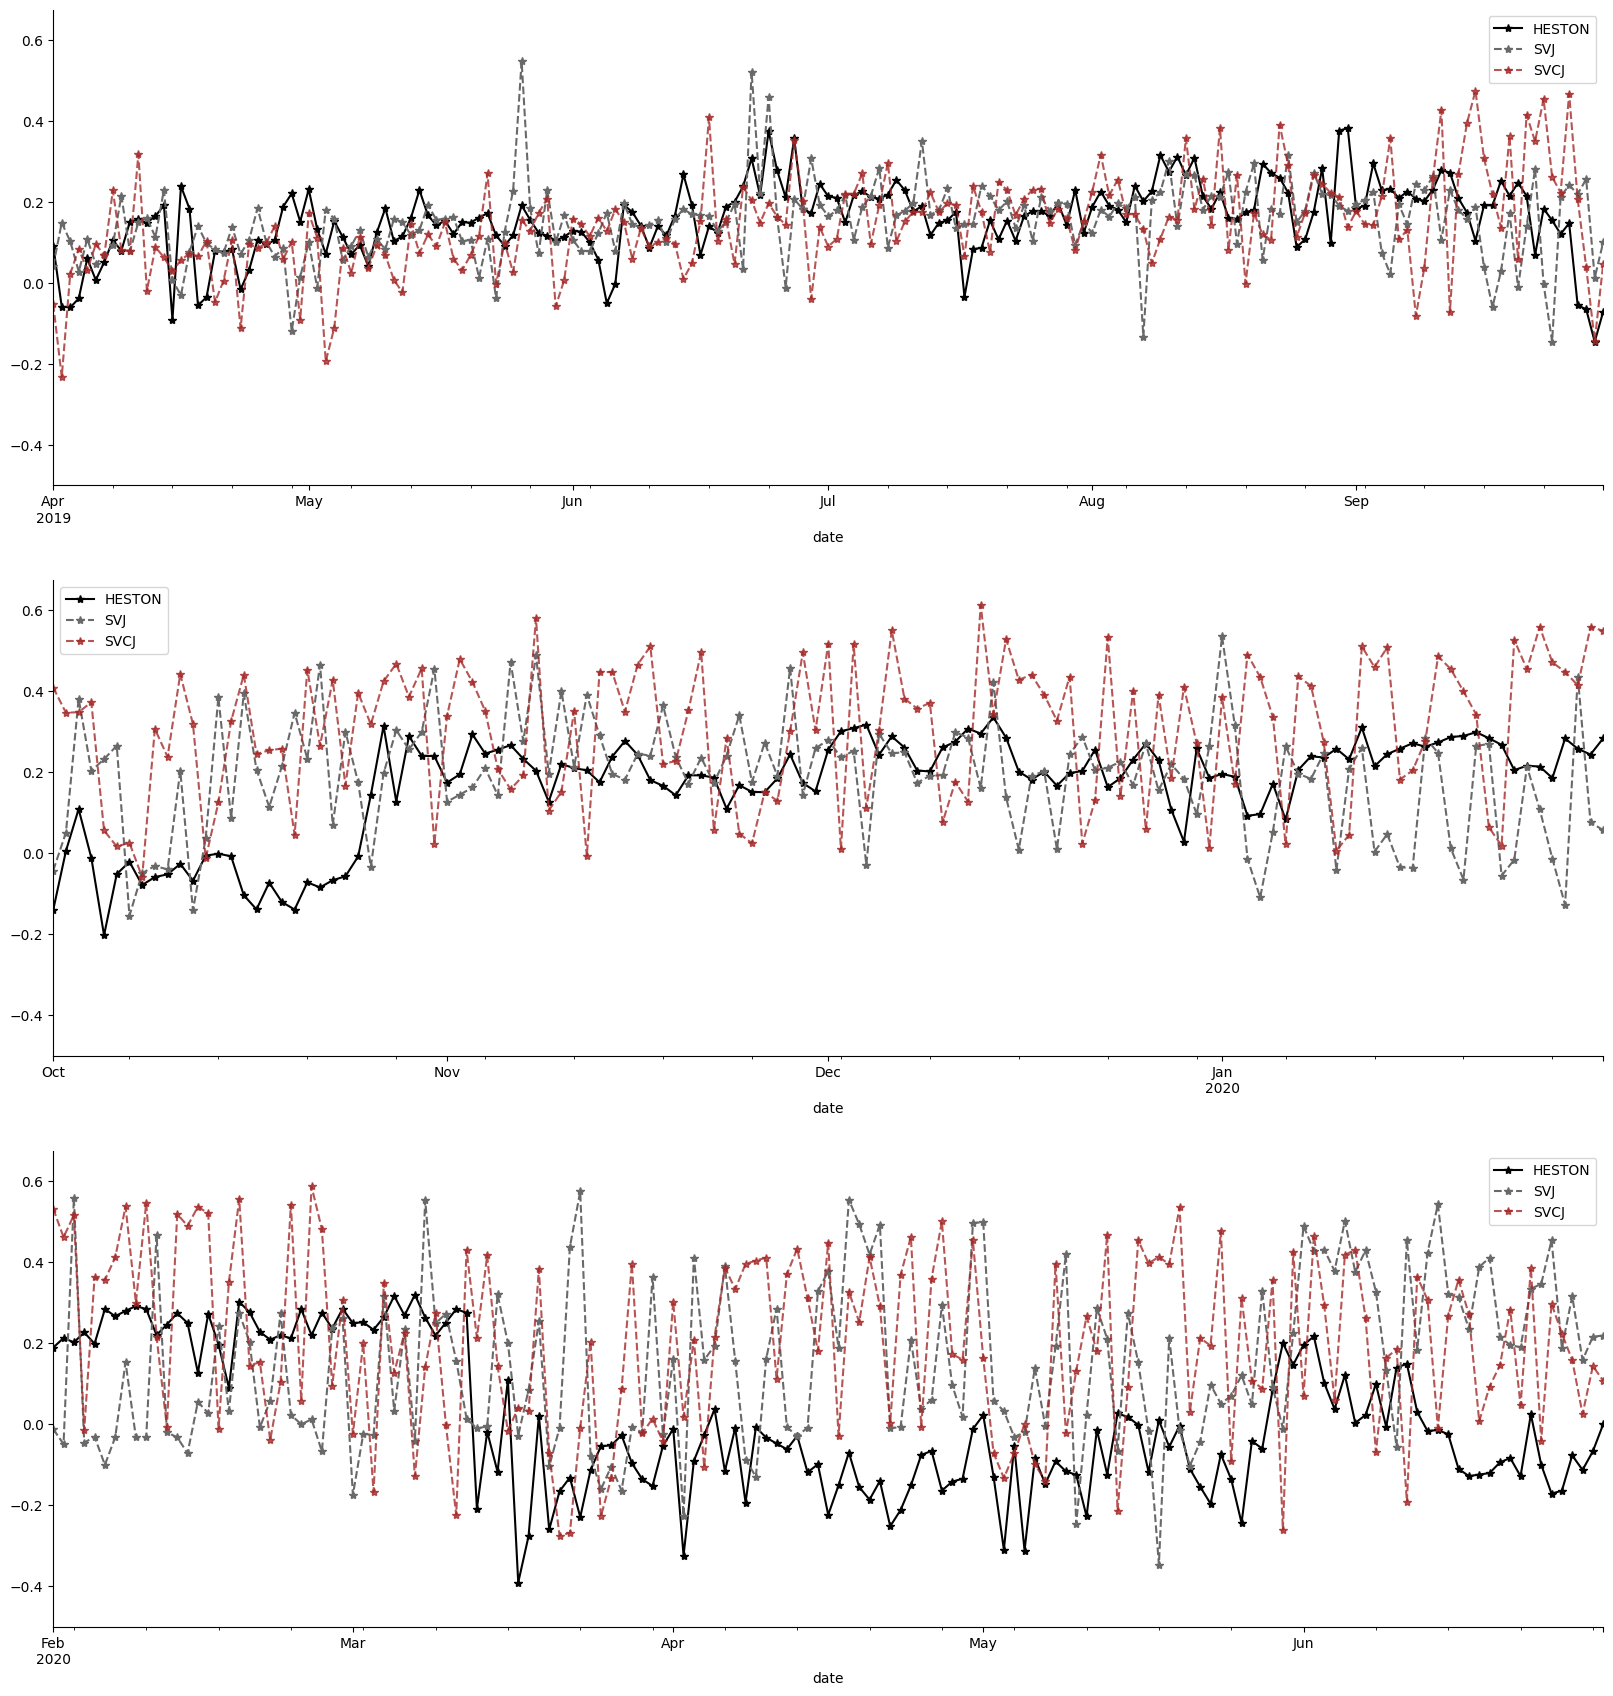

In [145]:
fig, axs = plt.subplots(nrows=3, figsize=(20, 21))


for idx, s in enumerate(SV_list_2):
    ax = axs[idx]
    #fig, ax = plt.subplots(figsize=(10, 4))
    s['HESTON'].plot(ax=ax, color = 'black',marker='*',label="HESTON")
    s['SVJ'].plot(ax=ax,  linestyle='dashed',color='dimgray',marker='*',label="SVJ")
    s['SVCJ'].plot(ax=ax,  linestyle='dashed',color='brown',marker='*',label="SVCJ",alpha=0.8)
    
# Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylim((-.5, 0.1+max(rho['SVJ'])))
    ax.legend()
    
fig.savefig(f'Results/calibration/figures/rho_3.pdf',transparent=True)

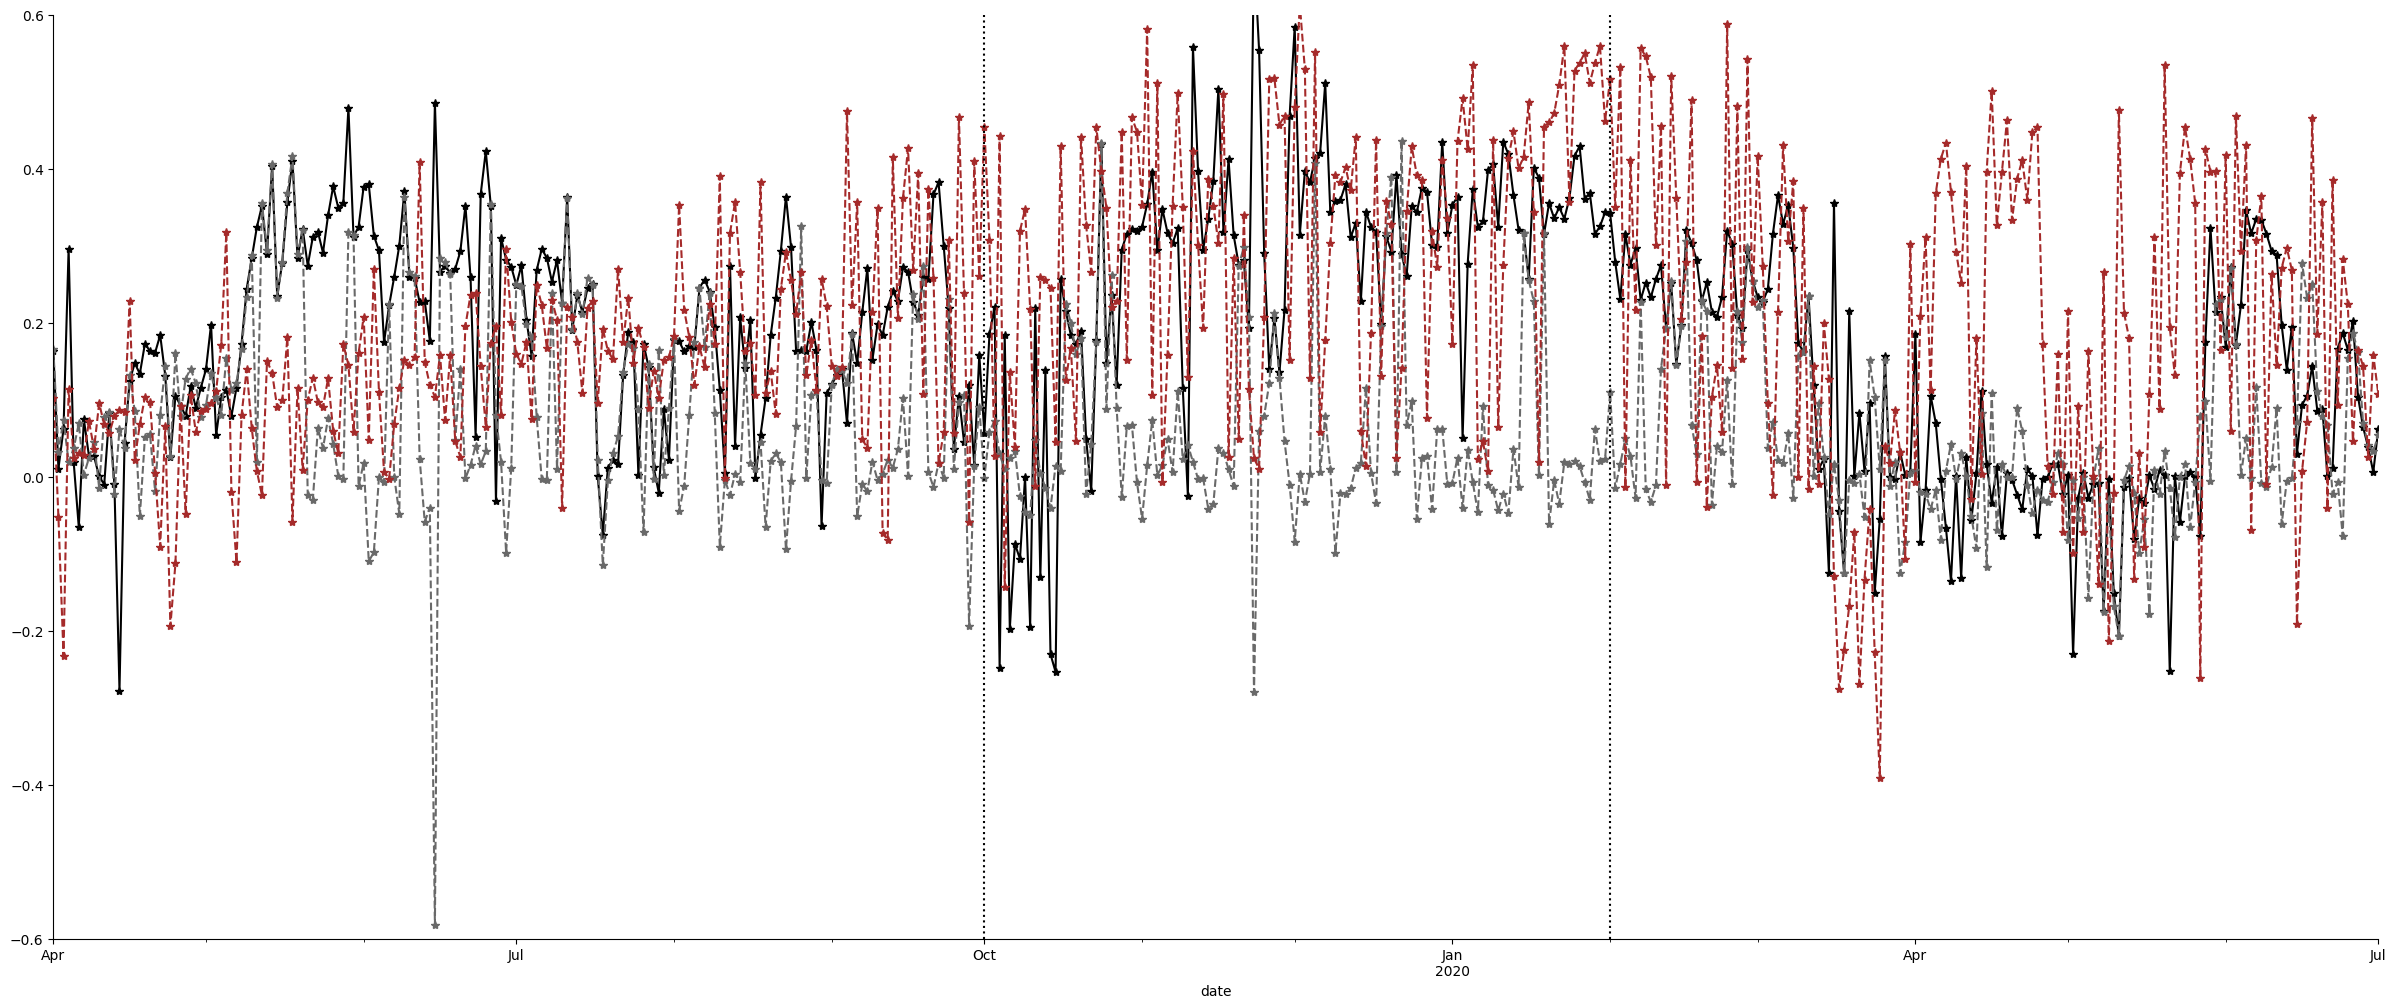

In [ ]:
fig, ax = plt.subplots(figsize=(30, 12))
#fig, ax = plt.subplots(figsize=(35, 12))
rho['HESTON'].plot(ax=ax, label="Std", color = 'black',marker='*')
rho['SVJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='dimgray',marker='*')
rho['SVCJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='brown',marker='*')


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_ylim(ymin=-0.6,ymax=0.6)

ax.vlines('2019-10-01', -0.6, ymax=0.6, colors='black', linestyles='dotted') #, 
ax.vlines('2020-02-01', -0.6, ymax=0.6, colors='black', linestyles='dotted')

fig.savefig(f'Results/calibration/figures/sv_rho_one.pdf', transparent=True)





In [148]:
def read_models(models,parameter):
    df = pd.read_csv(f'Results/calibration/results/test_run/BLACK_SCHOLES/parameters.csv',usecols=['date'])
    for x in models:
        df[x] = pd.read_csv(f'Results/calibration/results/test_run/{x}/parameters.csv')[parameter]
        df[x][df[x].idxmax()] =np.mean(df[x])
    #Fix date index
    df.date = pd.to_datetime(df.date,format='%Y%m%d')
    df = df.sort_values(by='date')
    df = df.set_index('date')
    
    return df

# Split

def list_split(df):
    df1 = df[(df.index >= '2019-04-01') & (df.index < '2019-10-01')]
    df2 = df[(df.index >= '2019-10-01') & (df.index < '2020-02-01')]
    df3 = df[(df.index >= '2020-02-01') & (df.index < '2020-07-01')]
    liste = [df1,df2,df3]
    return liste

In [149]:
kappa = read_models(SV,'VBAR')

kappa_split = list_split(kappa)

C:\Users\Yassir EL-ORFI\AppData\Local\Temp\ipykernel_11108\3309403971.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x][df[x].idxmax()] =np.mean(df[x])
C:\Users\Yassir EL-ORFI\AppData\Local\Temp\ipykernel_11108\3309403971.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x][df[x].idxmax()] =np.mean(df[x])
C:\Users\Yassir EL-ORFI\AppData\Local\Temp\ipykernel_11108\3309403971.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<Axes: xlabel='date'>

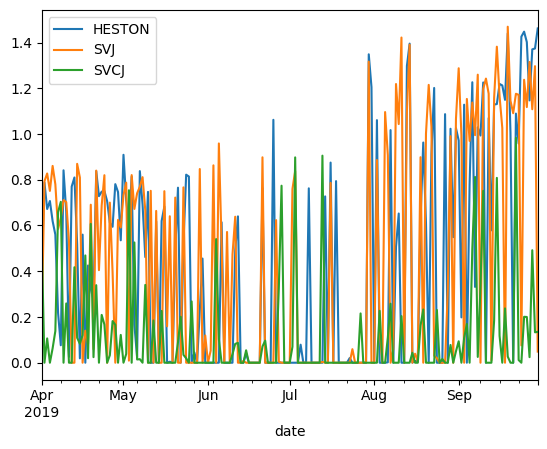

In [150]:
kappa_split[0].plot()

In [151]:
fig, ax = plt.subplots(figsize=(30, 10))
kappa['HESTON'].plot(ax=ax, label="Std", color = 'black',marker='*')
kappa['SVJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='dimgray',marker='*')
kappa['SVCJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='orange',marker='*')


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_ylim(ymin=0,ymax=1.5)

ax.vlines('2019-10-01', 0, ymax=np.max(kappa['HESTON']), colors='black', linestyles='dotted') #, 
ax.vlines('2020-02-01', 0, ymax=np.max(kappa['HESTON']), colors='black', linestyles='dotted')

fig.savefig(f'Results/calibration/figures/bsjd_vol.pdf', transparent=True)

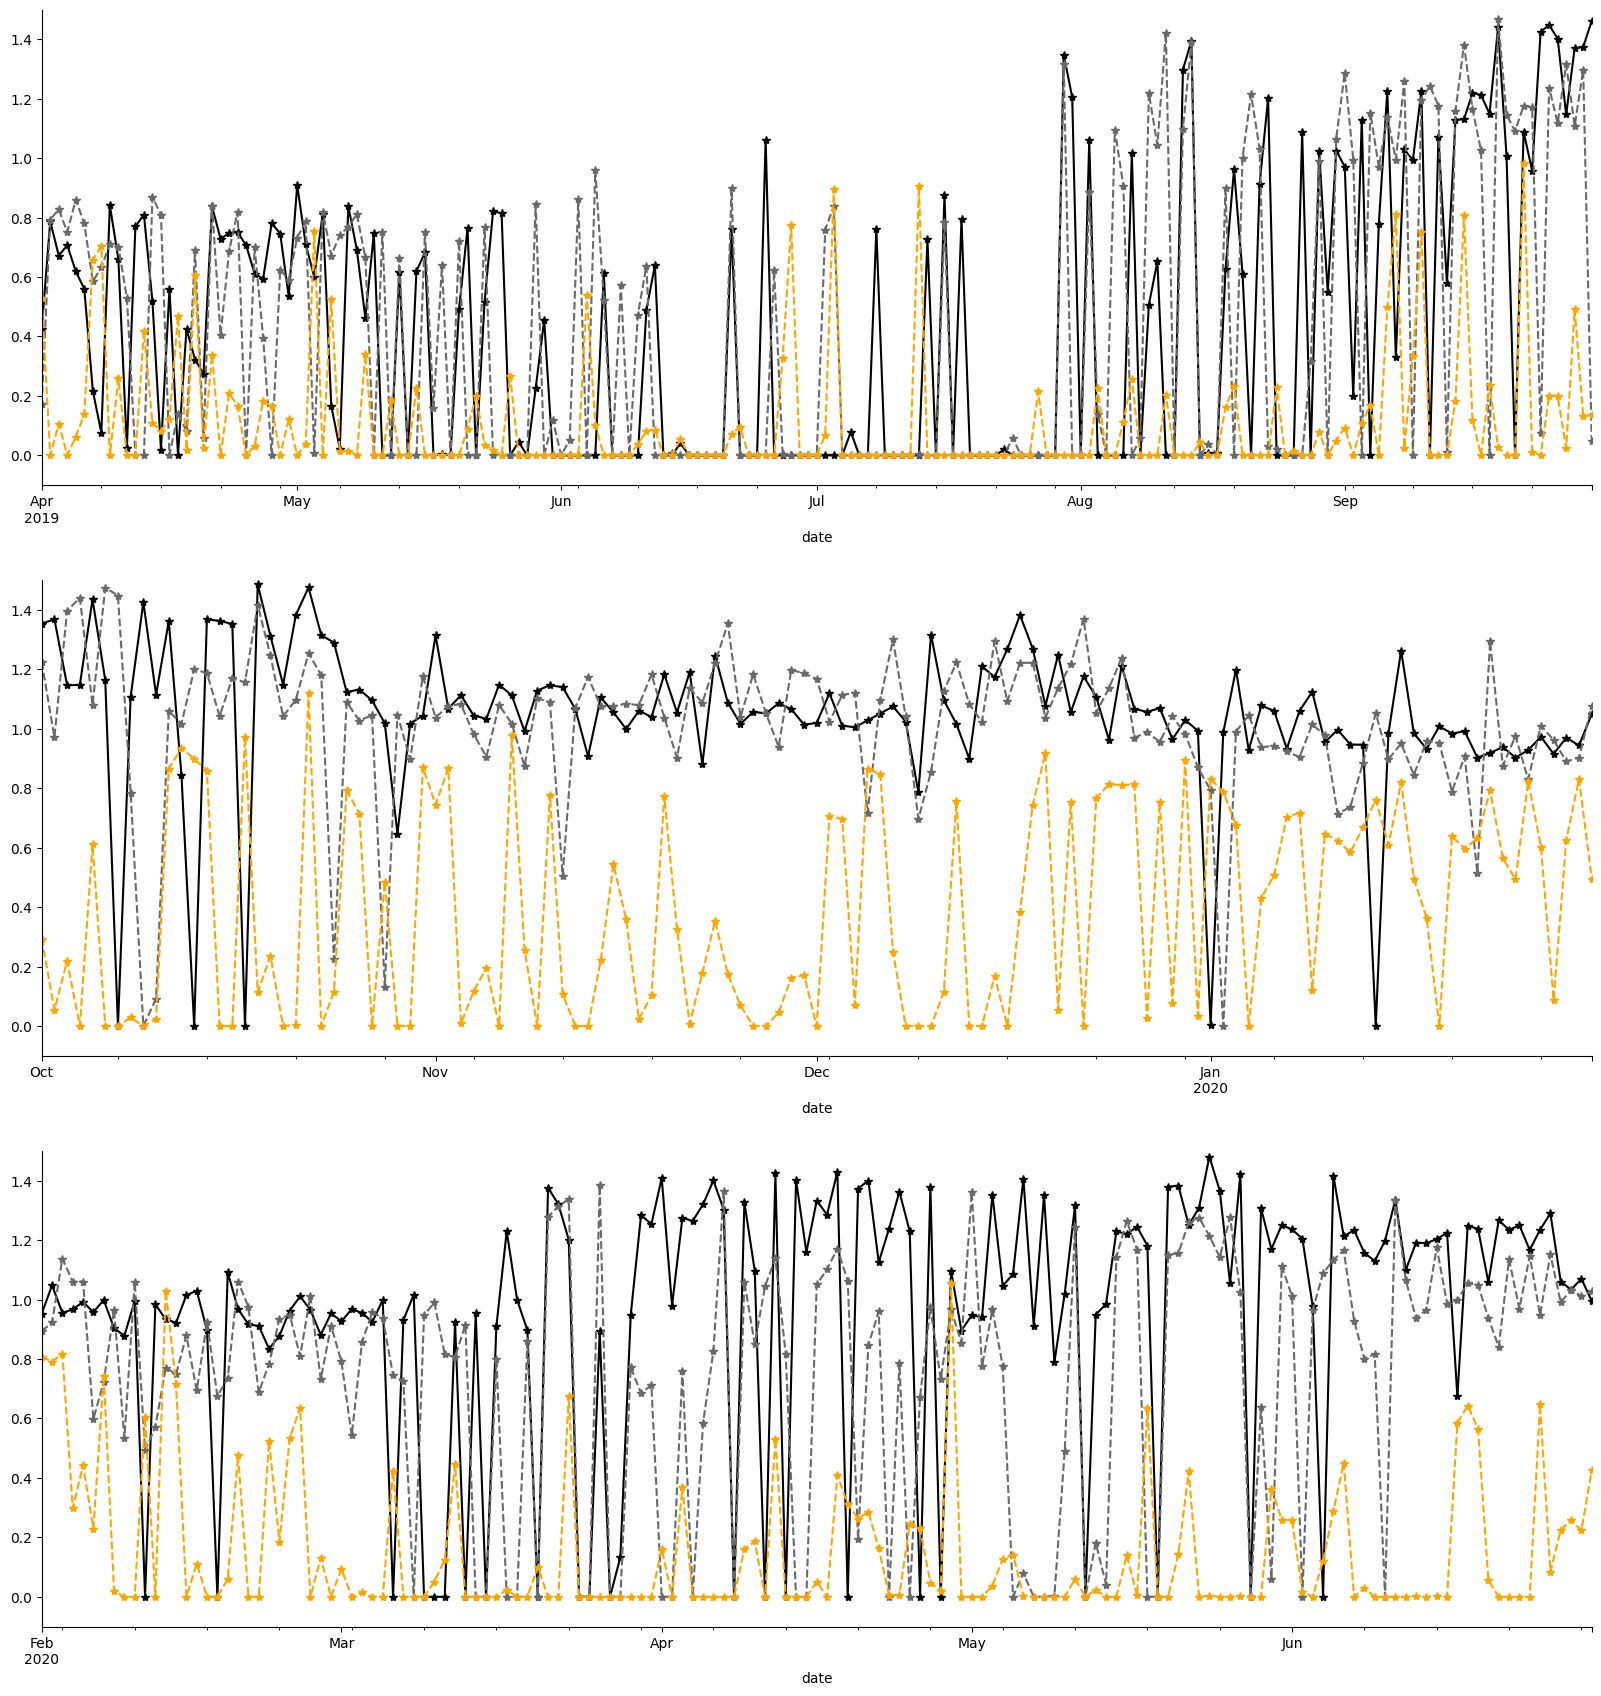

In [154]:
fig, axs = plt.subplots(nrows=3, figsize=(20, 21))


for idx, s in enumerate(kappa_split):
    ax = axs[idx]
    #fig, ax = plt.subplots(figsize=(10, 4))
    s['HESTON'].plot(ax=ax, color = 'black',marker='*')
    s['SVJ'].plot(ax=ax,  linestyle='dashed',color='dimgray',marker='*')
    s['SVCJ'].plot(ax=ax,  linestyle='dashed',color='orange',marker='*')
    
# Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylim((-0.1, 1.5))
    
fig.savefig(f'Results/calibration/figures/VBAR_3.pdf',transparent=True)